<a href="https://colab.research.google.com/github/pailamadhulatha2/SmartEnergy-Forecasting/blob/main/Smart_Energy_Consumption_Forecasting_Using_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 2018Floor1.csv to 2018Floor1 (1).csv
                  Date  z1_Light(kW)  z1_Plug(kW)  z2_AC1(kW)  z2_AC2(kW)  \
0  2018-07-01 00:00:00         12.94        18.56       45.24        0.01   
1  2018-07-01 00:01:00         12.97        18.55       45.28        0.02   
2  2018-07-01 00:02:00         12.97        18.55       45.24        0.01   
3  2018-07-01 00:03:00         12.98        18.58       45.26        0.02   
4  2018-07-01 00:04:00         13.01        18.60       45.22        0.02   

   z2_AC3(kW)  z2_AC4(kW)  z2_Light(kW)  z2_Plug(kW)  z3_Light(kW)  \
0        0.01        0.00         13.76        17.64         10.92   
1        0.01        0.01         13.76        17.21         10.95   
2        0.01        0.01         13.79        17.18         10.94   
3        0.01        0.00         13.81        16.64         10.94   
4        0.01        0.01         13.83        15.69         10.97   

   z3_Plug(kW)  z4_Light(kW)  
0         0.89         35.76  
1         

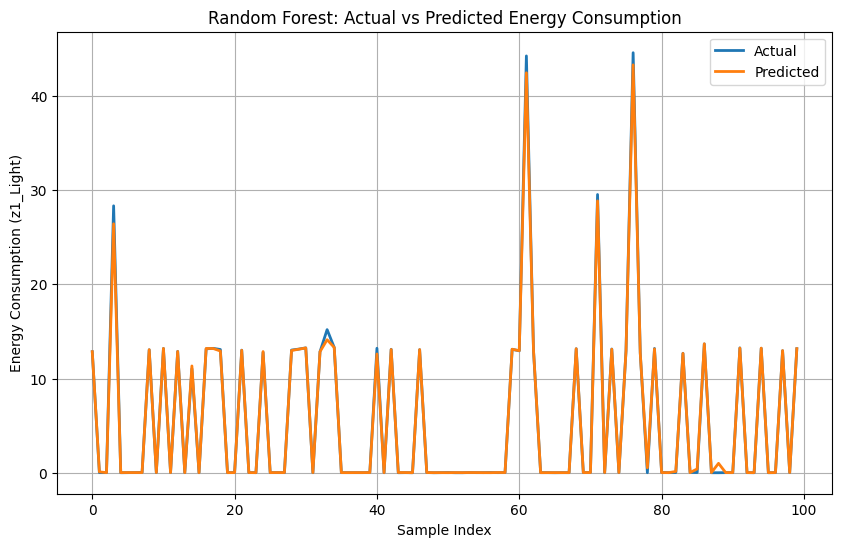

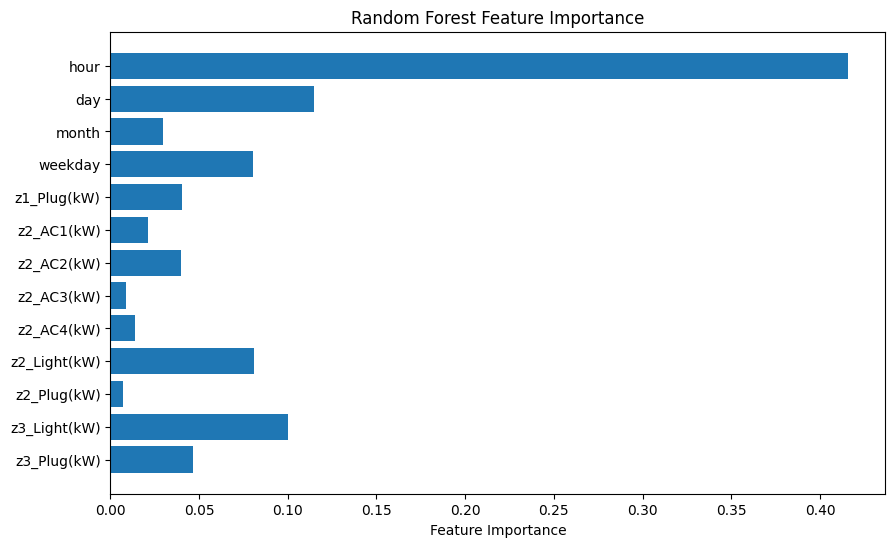

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install required libraries
!pip install pandas numpy scikit-learn matplotlib openpyxl

# Step 2: Upload your CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Load the dataset
import pandas as pd
df = pd.read_csv('2018Floor1.csv')  # Make sure this matches your uploaded file name

# Step 4: Preview the dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 5: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 6: Extract time-based features
df['hour'] = df['Date'].dt.hour
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.dayofweek

# Step 7: Handle missing values
print("\nMissing values per column:")
print(df.isnull().sum())
df = df.dropna()

# Step 8: Define input features and target variable
X = df[['hour', 'day', 'month', 'weekday',
        'z1_Plug(kW)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)',
        'z2_Light(kW)', 'z2_Plug(kW)', 'z3_Light(kW)', 'z3_Plug(kW)']]
y = df['z1_Light(kW)']

# Step 9: Show shapes of input and output
print("\nInput feature shape:", X.shape)
print("Output label shape:", y.shape)

# Step 10: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Step 11: Train Linear Regression and Random Forest models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 12: Predict and evaluate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nLinear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.2f}")
print(f"\nRandom Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

# Step 13: Plot actual vs predicted for Random Forest
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred_rf[:100], label='Predicted', linewidth=2)
plt.title('Random Forest: Actual vs Predicted Energy Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (z1_Light)')
plt.legend()
plt.grid(True)
plt.show()

# Step 14: Plot feature importance
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Step 15: Save and download the model
import joblib
joblib.dump(rf_model, 'energy_model.pkl')

from google.colab import files
files.download('energy_model.pkl')
